In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-office-dataset/the_office_series.csv


In [2]:
df=pd.read_csv('../input/the-office-dataset/the_office_series.csv')
df=df.rename(columns={'Unnamed: 0':'Eps_num'})
df.head()

,Eps_num,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


In [3]:
color=[]
for ind,row in df.iterrows():
    if row['Ratings'] < 7.2:
        color.append('red')
    elif row['Ratings'] < 8.3:
        color.append('orange')
    elif row['Ratings'] < 9:
        color.append('lightgreen')
    else:
        color.append('darkgreen')

df['color']=color

In [4]:
size=[]
df['has_guests']= ~df['GuestStars'].isnull()

for ind,row in df.iterrows():
    if row['has_guests']==False:
        size.append(25)
    else:
        size.append(250)
        
df['size']=size

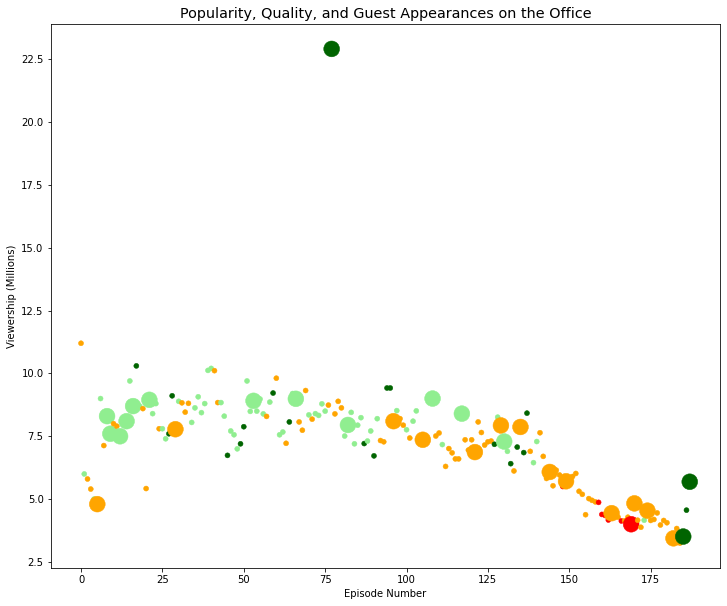

In [5]:
fig ,ax =plt.subplots()
plt.style.use('ggplot')
fig.set_size_inches([12,10])
ax.scatter(df['Eps_num'],df['Viewership'],c =color,s=size)
ax.set_title('Popularity, Quality, and Guest Appearances on the Office')
ax.set_xlabel('Episode Number')
ax.set_ylabel('Viewership (Millions)')
plt.show()


In [6]:
geuest_eps=df[df['has_guests']==True]
sorted_by_watched=geuest_eps.sort_values('Viewership',ascending=False)
stars=sorted_by_watched.iloc[0,9].split(',')
top_star=stars[0]
top_star

'Cloris Leachman'

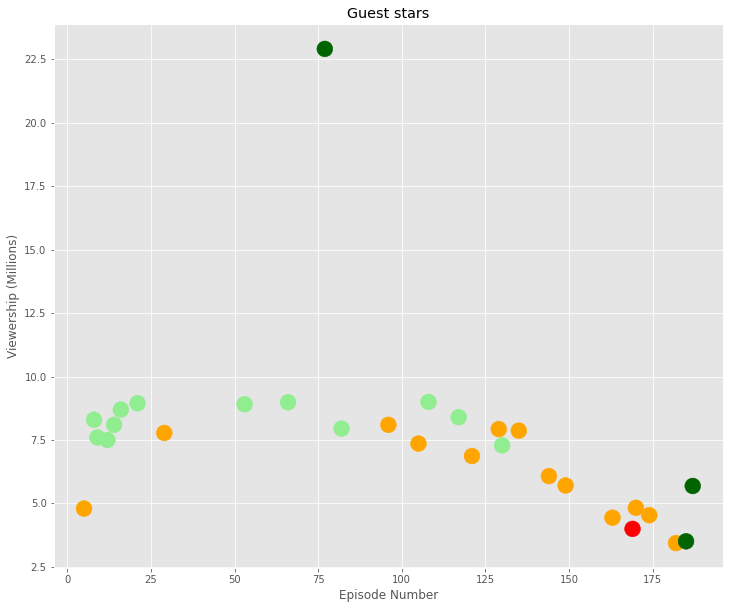

In [7]:
fig ,ax =plt.subplots()
plt.style.use('ggplot')
fig.set_size_inches([12,10])
ax.scatter(geuest_eps['Eps_num'],geuest_eps['Viewership'],c =geuest_eps['color'],s=geuest_eps['size'])
ax.set_title('Guest stars')
ax.set_xlabel('Episode Number')
ax.set_ylabel('Viewership (Millions)')
plt.show()
